## week2 事前課題1 チェス盤

# 3.少ないマスで考える

In [2]:
import numpy as np

n_spuares = 4
small_board_list=[1]
a = 1

for i in range(0,n_spuares -1):
    a*=2
    small_board_list.append(a)

small_board_ndarray = np.array(small_board_list)

print("{}マスの板に小麦を並べる（list）：{}"
      .format(n_spuares,small_board_list))

4マスの板に小麦を並べる（list）：[1, 2, 4, 8]


In [13]:
print("{}マスの板に小麦を並べる（ndarray）：{}"
      .format(n_spuares,small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


# 【問題1】2×2マスのチェス盤の小麦の数
>2×2マスのチェス盤をndarrayによって表現し、
各マスの小麦の数を計算してください。
左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に
進みます。

In [4]:
#ndarrayのshapeの変形
small_board_ndarray.shape=(2,2)
small_board_square_array=small_board_ndarray
print(small_board_square_array)


#各マスの小麦を計算?
b=0
for i in range(n_spuares):
    b += 1
    #print(small_board_ndarray[b])    


[[1 2]
 [4 8]]


# 【問題2】n×mマスへの拡張

In [9]:
def nm_squares(n=2,m=2):
    board_list=[1]
    j = 1
    
    for i in range(0,n*m-1):
        j *= 2
        board_list.append(j)
        
    board_ndarray = np.array(board_list)
    board_ndarray.shape=(n,m)
    
    return board_ndarray

print(nm_squares(8,8))

[[1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01 1.28000000e+02]
 [2.56000000e+02 5.12000000e+02 1.02400000e+03 2.04800000e+03
  4.09600000e+03 8.19200000e+03 1.63840000e+04 3.27680000e+04]
 [6.55360000e+04 1.31072000e+05 2.62144000e+05 5.24288000e+05
  1.04857600e+06 2.09715200e+06 4.19430400e+06 8.38860800e+06]
 [1.67772160e+07 3.35544320e+07 6.71088640e+07 1.34217728e+08
  2.68435456e+08 5.36870912e+08 1.07374182e+09 2.14748365e+09]
 [4.29496730e+09 8.58993459e+09 1.71798692e+10 3.43597384e+10
  6.87194767e+10 1.37438953e+11 2.74877907e+11 5.49755814e+11]
 [1.09951163e+12 2.19902326e+12 4.39804651e+12 8.79609302e+12
  1.75921860e+13 3.51843721e+13 7.03687442e+13 1.40737488e+14]
 [2.81474977e+14 5.62949953e+14 1.12589991e+15 2.25179981e+15
  4.50359963e+15 9.00719925e+15 1.80143985e+16 3.60287970e+16]
 [7.20575940e+16 1.44115188e+17 2.88230376e+17 5.76460752e+17
  1.15292150e+18 2.30584301e+18 4.61168602e+18 9.22337204e+18]]

In [10]:
2**63

9223372036854775808

# 【問題3】小麦の数の合計

In [11]:
#チェス盤上の小麦の合計
k=8
l=8
grain_total = np.sum(nm_squares(k,l))

print("{}x{}マスのチェス盤の小麦の数の合計は{}".format(k,l,grain_total))

8x8マスのチェス盤の小麦の数の合計は1.8446744073709552e+19


[3.18750000e+01 8.16000000e+03 2.08896000e+06 5.34773760e+08
 1.36902083e+11 3.50469331e+13 8.97201488e+15 2.29683581e+18]


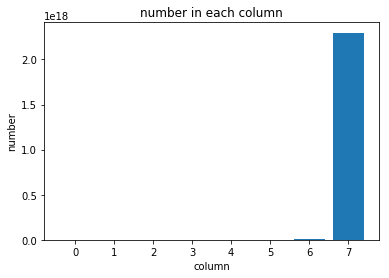

In [12]:
#各列の平均
nm_squares_meanver = np.mean(nm_squares(k,l),axis=1)

print(nm_squares_meanver)


#棒グラフ化

import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(l), np.array(nm_squares_meanver))
plt.show()

# 【問題4】小麦の数のヒートマップ

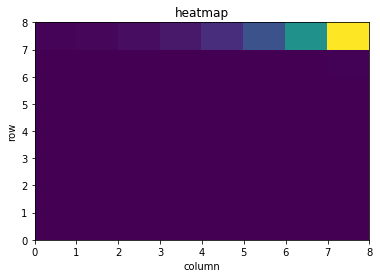

In [116]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")

plt.pcolor(np.array(nm_squares(k,l)).reshape(k,l))
plt.show()

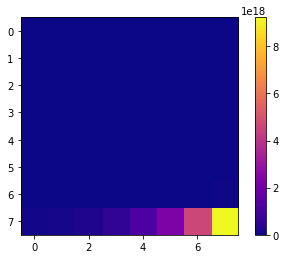

In [123]:
# 他の方法
mat = nm_squares(k,l)

# ヒートマップ表示
plt.figure()
plt.imshow(mat,interpolation='nearest',cmap='plasma')
plt.colorbar()
plt.show()

# 【問題5】後半は前半の何倍か
>チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。
前半とは配列の0から3行目、後半は4から7行目です。

In [141]:
chess_sprit = np.split(nm_squares(k,l) ,2)

#print(chess_sprit[0])
#print(chess_sprit[1])

chess_sum_first = np.sum(chess_sprit[0])
chess_sum_second = np.sum(chess_sprit[1])

print(chess_sum_second/chess_sum_first)

4294967296.0


# 6.他の計算方法

In [13]:
#ndarrayのnp.append()とfor文を使う
n_squares = 4
small_board_ndarray = np.array([1])

for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])


print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


In [16]:
#ブロードキャスト
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ブロードキャスト）：\n{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ブロードキャスト）：
[1 2 4 8]


In [31]:
n_squares = 64
board_ndarray = np.array([1]).astype(np.uint64) #.astype(np.uint64) 追加
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9.223372036854776e+18


In [24]:
print(board_ndarray.dtype)

float64


In [19]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9223372036854775808


# 【問題6】他の計算方法によるn×mマスへの拡張
>「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。
それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。

In [38]:
#np.append()
n = 8
m = 8

n_squares = n*m
board_ndarray = np.array([1]).astype(np.uint64) #.astype(np.uint64) 追加

for _ in range(n_squares-1):
    board_ndarray = np.append(board_ndarray,2*board_ndarray[-1])



print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9.223372036854776e+18


In [43]:
#ブロードキャスト
n = 8
m = 8
n_squares = n*m

indices_of_squares = np.arange(n_squares)
nm_board_ndarray = 2**indices_of_squares

print("最後のマスの小麦の数：{}".format(board_ndarray[-1]))

最後のマスの小麦の数：9.223372036854776e+18


# 【問題7】計算時間の比較

In [46]:
%%timeit
n = 8
m = 8

n_squares = n*m
board_ndarray = np.array([1]).astype(np.uint64) #.astype(np.uint64) 追加

for _ in range(n_squares-1):
    board_ndarray = np.append(board_ndarray,2*board_ndarray[-1])


230 µs ± 3.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [47]:
%%timeit
n = 8
m = 8
n_squares = n*m

indices_of_squares = np.arange(n_squares)
nm_board_ndarray = 2**indices_of_squares

1.86 µs ± 52.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
#両者の拡張性にあまり差はないが、ブロードキャストの方がシンプルで見やすく、
#またfor文の方がブロードキャストに比べ１５０倍ほど時間がかかるため、最適解とは言えない